# <center> <a href="https://www.gapminder.org/">Working with GapMinder</a></center>

<center><a href="https://www.gapminder.org/data/"> <img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/gapminder-logo.svg" alt="GapMinder" width=1000/></a>  </center>

* **GapMinder** is a teaching project that identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions.

* Compiles and makes available many useful cross-country data sources

* [Free](https://www.gapminder.org/free-material/) and easy to access (once you understand how)

* Lot's of variables are available, from multiple sources covering the period after 1800. 

# Setup

# Import Modules and set Paths

In [ ]:
# Basic Packages
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Import display options for showing websites
from IPython.display import IFrame, HTML

In [ ]:
# Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

/tmp/ipykernel_112/2949915091.py:7: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packag

In [ ]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Next line can import all of plotnine, but may overwrite things? Better import each function/object you need
#from plotnine import *

Using matplotlib backend: <object object at 0x7fdaf678dcd0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Data Munging
from itertools import product, combinations
import difflib
import pycountry
import geocoder
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')
mapper2 = country(from_key='iso3', to_key='iso')
mapper3 = country(from_key='iso3', to_key='name')

# Regressions & Stats
from scipy.stats import norm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

In [ ]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [ ]:
currentYear = datetime.now().year
year = min(2020, currentYear-2)

# Getting data from GapMinder

There are two ways of getting data from GapMinder:
1. Use [GapMinder Data Website](https://www.gapminder.org/data/) and select a series of interest and download it as a CSV or Excel file.
2. Download the series of interest from [GapMinder's Github reporsitories](https://www.gapminder.org/data/):

    * [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis) (indicators inherited from Gapminder World, many are still updated)
    * [Fast Track](https://github.com/open-numbers/ddf--gapminder--fasttrack) (indicators they compile manually)
    * [World Development Indicators (WDI)](https://github.com/open-numbers/ddf--open_numbers--world_development_indicators) (direct copy from World Bank repository)
    
Below we will access GapMinder's data via Github, since it is much easier and efficient.

<div class="alert alert-block alert-info">
    <b>Note:</b> Although GapMinder provides WDI data, it is better to use the approach shown in the <a hfref="https://github.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/blob/main/Working-with-WDI.ipynb" style="font-weight: bold; color: blue;">Working with  World Development Indicators notebook</a>.
</div>

# [GapMinder Data Website](https://www.gapminder.org/data/)

So, we can get data from their [GitHub site](https://github.com/open-numbers/ddf--gapminder--systema_globalis). 

Two approaches:
1. Clone repository and process (we could process everything to create one giant database)
2. Access specific files we are interested in

Here we'll follow approach 2

# Let's start by getting country names, codes, etc.

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/'
file = 'ddf--entities--geo--country.csv'
countries_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
countries_gm.head()

country g77_and_oecd_countries income_3groups        income_groups  \
0    abkh                 others            NaN                  NaN   
1     abw                 others    high_income          high_income   
2     afg                    g77     low_income           low_income   
3     ago                    g77  middle_income  lower_middle_income   
4     aia                 others            NaN                  NaN   

   is--country iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  \
0         True              NaN              NaN                NaN       NaN   
1         True               AW              ABW              533.0       NaN   
2         True               AF              AFG                4.0       NaN   
3         True               AO              AGO               24.0       NaN   
4         True               AI              AIA              660.0       NaN   

   landlocked  ...         name              un_sdg_ldc  \
0         NaN  ...     Abkhazia                     NaN   
1   coastline  ...        Aruba  un_not_least_developed   
2  landlocked  ...  Afghanistan      un_least_developed   
3   coastline  ...       Angola      un_least_developed   
4   coastline  ...     Anguilla  un_not_least_developed   

                        un_sdg_region un_state           unhcr_region  \
0                                 NaN    False                    NaN   
1  un_latin_america_and_the_caribbean    False         unhcr_americas   
2        un_central_and_southern_asia     True     unhcr_asia_pacific   
3               un_sub_saharan_africa     True  unhcr_southern_africa   
4  un_latin_america_and_the_caribbean    False         unhcr_americas   

  unicef_region  unicode_region_subtag west_and_rest world_4region  \
0           NaN                    NaN           NaN        europe   
1           NaN                     AW           NaN      americas   
2            sa                     AF          rest          asia   
3           ssa                     AO          rest        africa   
4           NaN                     AI           NaN      americas   

         world_6region  
0  europe_central_asia  
1              america  
2           south_asia  
3   sub_saharan_africa  
4              america  

[5 rows x 23 columns]

# Now let's get Life-Expectancy Data

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--gapminder_world/master/'
file = 'ddf--datapoints--life_expectancy_years--by--geo--time.csv'
life_exp = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
life_exp.head()

geo  life_expectancy_years  time
0  afg                  28.21  1800
1  afg                  28.20  1801
2  afg                  28.19  1802
3  afg                  28.18  1803
4  afg                  28.17  1804

## Since it includes projections, let's drop values after {{year}}

In [ ]:
life_exp = life_exp.loc[life_exp.time<=year].reset_index(drop=True)
life_exp.head()

geo  life_expectancy_years  time
0  afg                  28.21  1800
1  afg                  28.20  1801
2  afg                  28.19  1802
3  afg                  28.18  1803
4  afg                  28.17  1804

# Let's get GDPpc

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--gdp_per_capita_cppp/master/'
file = 'ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv'
gdppc_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
gdppc_gm.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                683    
1  afg  1801                                                683    
2  afg  1802                                                683    
3  afg  1803                                                683    
4  afg  1804                                                683

## Since it includes projections, let's drop values after {{year}}

In [ ]:
gdppc_gm = gdppc_gm.loc[gdppc_gm.time<=year].reset_index(drop=True)
gdppc_gm.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                683    
1  afg  1801                                                683    
2  afg  1802                                                683    
3  afg  1803                                                683    
4  afg  1804                                                683

# Let's get TFR

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--children_per_woman_total_fertility--by--geo--time.csv'
tfr_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
tfr_gm.head()

geo  time  children_per_woman_total_fertility
0  abw  1800                                5.64
1  abw  1801                                5.64
2  abw  1802                                5.64
3  abw  1803                                5.64
4  abw  1804                                5.64

## Since it includes projections, let's drop values after {{year}}

In [ ]:
tfr_gm = tfr_gm.loc[tfr_gm.time<=year].reset_index(drop=True)
tfr_gm.head()

geo  time  children_per_woman_total_fertility
0  abw  1800                                5.64
1  abw  1801                                5.64
2  abw  1802                                5.64
3  abw  1803                                5.64
4  abw  1804                                5.64

# Let's get CDR

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--crude_death_rate_deaths_per_1000_population--by--geo--time.csv'
cdr_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
cdr_gm = cdr_gm.loc[cdr_gm.time<=year].reset_index(drop=True)
cdr_gm.head()

geo  time  crude_death_rate_deaths_per_1000_population
0  abw  1950                                       10.383
1  abw  1951                                       10.029
2  abw  1952                                        9.394
3  abw  1953                                        8.858
4  abw  1954                                        8.331

# Let's get CBR

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--crude_birth_rate_births_per_1000_population--by--geo--time.csv'
cbr_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
cbr_gm = cbr_gm.loc[cbr_gm.time<=year].reset_index(drop=True)
cbr_gm.head()

geo  time  crude_birth_rate_births_per_1000_population
0  abw  1800                                        39.51
1  abw  1801                                        39.51
2  abw  1802                                        39.51
3  abw  1803                                        39.51
4  abw  1804                                        39.51

# Let's get Contraception use

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--contraceptive_use_percent_of_women_ages_15_49--by--geo--time.csv'
contraception_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
contraception_gm = contraception_gm.loc[contraception_gm.time<=year].reset_index(drop=True)
contraception_gm.head()

geo  time  contraceptive_use_percent_of_women_ages_15_49
0  afg  2000                                            5.3
1  afg  2003                                           10.3
2  afg  2005                                           13.6
3  afg  2006                                           18.6
4  afg  2008                                           22.8

# Let's get Food Supply

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--food_supply_kilocalories_per_person_and_day--by--geo--time.csv'
food_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
food_gm = food_gm.loc[food_gm.time<=year].reset_index(drop=True)
food_gm.head()

geo  time  food_supply_kilocalories_per_person_and_day
0  afg  1961                                         2999
1  afg  1962                                         2917
2  afg  1963                                         2698
3  afg  1964                                         2953
4  afg  1965                                         2956

# Let's get GDP per worker

In [ ]:
url = 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/'
file = 'ddf--datapoints--gdpperemployee_us_inflation_adjusted--by--geo--time.csv'
gdppc_pw_gm = pd.read_csv(url + file, 
                           encoding='utf-8', keep_default_na=False, na_values='')
gdppc_pw_gm = gdppc_pw_gm.loc[cbr_gm.time<=year].reset_index(drop=True)
gdppc_pw_gm.head()

geo  time  gdpperemployee_us_inflation_adjusted
0  afg  1991                               2393.89
1  afg  1992                               2226.67
2  afg  1993                               1529.35
3  afg  1994                               1100.26
4  afg  1995                               1550.83

# Merge

In [ ]:
df = countries_gm.merge(life_exp, left_on='country', right_on='geo', how='right')
print(df.shape)
df = df.merge(gdppc_gm, on=['geo', 'time'], how='inner')
print(df.shape)
df = df.merge(tfr_gm, on=['geo', 'time'], how='left')
df = df.merge(cbr_gm, on=['geo', 'time'], how='left')
df = df.merge(cdr_gm, on=['geo', 'time'], how='left')
df = df.merge(contraception_gm, on=['geo', 'time'], how='left')
df = df.merge(food_gm, on=['geo', 'time'], how='left')
df = df.merge(gdppc_pw_gm, on=['geo', 'time'], how='left')
df['year'] = df['time']
df

(43444, 26)
(40303, 27)


country g77_and_oecd_countries income_3groups income_groups  \
0         afg                    g77     low_income    low_income   
1         afg                    g77     low_income    low_income   
2         afg                    g77     low_income    low_income   
3         afg                    g77     low_income    low_income   
4         afg                    g77     low_income    low_income   
...       ...                    ...            ...           ...   
40298     ssd                    NaN     low_income    low_income   
40299     ssd                    NaN     low_income    low_income   
40300     ssd                    NaN     low_income    low_income   
40301     ssd                    NaN     low_income    low_income   
40302     ssd                    NaN     low_income    low_income   

       is--country iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric  \
0             True               AF              AFG                4.0   
1             True               AF              AFG                4.0   
2             True               AF              AFG                4.0   
3             True               AF              AFG                4.0   
4             True               AF              AFG                4.0   
...            ...              ...              ...                ...   
40298         True               SS              SSD              728.0   
40299         True               SS              SSD              728.0   
40300         True               SS              SSD              728.0   
40301         True               SS              SSD              728.0   
40302         True               SS              SSD              728.0   

      iso3166_2  landlocked  ...  life_expectancy_years  time  \
0           NaN  landlocked  ...                  28.21  1800   
1           NaN  landlocked  ...                  28.20  1801   
2           NaN  landlocked  ...                  28.19  1802   
3           NaN  landlocked  ...                  28.18  1803   
4           NaN  landlocked  ...                  28.17  1804   
...         ...         ...  ...                    ...   ...   
40298       NaN  landlocked  ...                  56.70  2011   
40299       NaN  landlocked  ...                  56.80  2012   
40300       NaN  landlocked  ...                  57.20  2013   
40301       NaN  landlocked  ...                  57.60  2014   
40302       NaN  landlocked  ...                  58.00  2015   

      income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                                    683      
1                                                    683      
2                                                    683      
3                                                    683      
4                                                    683      
...                                                  ...      
40298                                               4190      
40299                                               2196      
40300                                               2426      
40301                                               2461      
40302                                               2162      

      children_per_woman_total_fertility  \
0                                   7.00   
1                                   7.00   
2                                   7.00   
3                                   7.00   
4                                   7.00   
...                                  ...   
40298                               5.29   
40299                               5.20   
40300                               5.11   
40301                               5.02   
40302                               4.94   

      crude_birth_rate_births_per_1000_population  \
0                                           48.14   
1                                           48.14   
2                                           48.14 

# Let's get country groups etc from WDI as before

## Steps

In [ ]:
wbcountries = wb.get_countries()
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [ ]:
df['iso3c'] = df['country'].str.upper()
wdi = wbcountries.merge(df, on='iso3c', suffixes=['', '_GM'])
wdi.head()

iso3c iso2c         name      region adminregion incomeLevel lendingType  \
0   AFG    AF  Afghanistan  South Asia  South Asia  Low Income         IDA   
1   AFG    AF  Afghanistan  South Asia  South Asia  Low Income         IDA   
2   AFG    AF  Afghanistan  South Asia  South Asia  Low Income         IDA   
3   AFG    AF  Afghanistan  South Asia  South Asia  Low Income         IDA   
4   AFG    AF  Afghanistan  South Asia  South Asia  Low Income         IDA   

  capitalCity  longitude  latitude  ... life_expectancy_years  time  \
0       Kabul    69.1761   34.5228  ...                 28.21  1800   
1       Kabul    69.1761   34.5228  ...                 28.20  1801   
2       Kabul    69.1761   34.5228  ...                 28.19  1802   
3       Kabul    69.1761   34.5228  ...                 28.18  1803   
4       Kabul    69.1761   34.5228  ...                 28.17  1804   

  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                                683      
1                                                683      
2                                                683      
3                                                683      
4                                                683      

  children_per_woman_total_fertility  \
0                                7.0   
1                                7.0   
2                                7.0   
3                                7.0   
4                                7.0   

   crude_birth_rate_births_per_1000_population  \
0                                        48.14   
1                                        48.14   
2                                        48.14   
3                                        48.14   
4                                        48.14   

  crude_death_rate_deaths_per_1000_population  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  contraceptive_use_percent_of_women_ages_15_49  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   food_supply_kilocalories_per_person_and_day  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  gdpperemployee_us_inflation_adjusted  year  
0                                  NaN  1800  
1                                  NaN  1801  
2                                  NaN  1802  
3                                  NaN  1803  
4                                  NaN  1804  

[5 rows x 44 columns]

# Regression Analysis with 
<center><a href="statsmodels"><img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels" width=700/></a></center>

In [ ]:
url = 'https://www.statsmodels.org/stable/index.html'
IFrame(url, width=800, height=400)

## Linear Regressions using OLS 

It is very easy to run a regression in **statsmodels**. 

We only need

* Data in a **pandas** dataframe

* An equation we want to estimate

Equations are strings of the form 
```python
'dependent_variable ~ indep_var_1 + function(indep_var2) + C(indep_var3)'
```

where:
* `dependent_variable` is the outcome variable of interest
* `indep_var_1` is the first independent variable        
* `function(indep_var2)` is a function of another independent variable (if needed)      
* `C(indep_var3)` defines fixed-effects/dummies based on categories given in indep_var3

## Simple Regression of Log[Life Expectancy] and Log[GDP pc]

In [ ]:
wdi['ln_life_exp'] = wdi['life_expectancy_years'].apply(np.log)
wdi['ln_gdp_pc'] = wdi['income_per_person_gdppercapita_ppp_inflation_adjusted'].apply(np.log)
wdi['tfr'] = wdi['children_per_woman_total_fertility']
wdi['life_exp'] = wdi['life_expectancy_years']
wdi['gdp_pc'] = wdi['income_per_person_gdppercapita_ppp_inflation_adjusted']

In [ ]:
year = wdi['year'].max()

In [ ]:
yvar = 'ln_life_exp'
xvar = 'ln_gdp_pc'
zvar = 'tfr'

In [ ]:
dffig = wdi.loc[wdi.year==year]\
            .dropna(subset=[xvar, yvar, zvar])\
            .sort_values(by='region').reset_index(drop=True)
dffig.head()

iso3c iso2c                       name               region  \
0   PRK    KP  Korea, Dem. People's Rep.  East Asia & Pacific   
1   FSM    FM      Micronesia, Fed. Sts.  East Asia & Pacific   
2   MNG    MN                   Mongolia  East Asia & Pacific   
3   THA    TH                   Thailand  East Asia & Pacific   
4   LAO    LA                    Lao PDR  East Asia & Pacific   

                                   adminregion          incomeLevel  \
0  East Asia & Pacific (excluding high income)           Low Income   
1  East Asia & Pacific (excluding high income)  Lower Middle Income   
2  East Asia & Pacific (excluding high income)  Lower Middle Income   
3  East Asia & Pacific (excluding high income)  Upper Middle Income   
4  East Asia & Pacific (excluding high income)  Lower Middle Income   

      lendingType  capitalCity  longitude  latitude  ...  \
0  Not classified    Pyongyang    125.754  39.03190  ...   
1             IDA      Palikir    158.185   6.91771  ...   
2            IBRD  Ulaanbaatar    106.937  47.91290  ...   
3            IBRD      Bangkok    100.521  13.73080  ...   
4             IDA    Vientiane    102.177  18.58260  ...   

  crude_death_rate_deaths_per_1000_population  \
0                                       8.088   
1                                       5.008   
2                                       6.158   
3                                       6.724   
4                                       7.513   

  contraceptive_use_percent_of_women_ages_15_49  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  food_supply_kilocalories_per_person_and_day  \
0                                      2061.0   
1                                         NaN   
2                                      2483.0   
3                                      2782.0   
4                                      2738.0   

  gdpperemployee_us_inflation_adjusted  year ln_life_exp ln_gdp_pc   tfr  \
0                              1110.23  2015    4.268298  7.625107  1.92   
1                                  NaN  2015    4.204693  8.145550  3.19   
2                              9538.68  2015    4.178992  9.306559  2.79   
3                             10198.24  2015    4.318821  9.698000  1.50   
4                              2981.26  2015    4.195697  8.786304  2.76   

  life_exp gdp_pc  
0     71.4   2049  
1     67.0   3448  
2     65.3  11010  
3     75.1  16285  
4     66.4   6544  

[5 rows x 49 columns]

In [ ]:
mod = smf.ols(formula='ln_life_exp ~ ln_gdp_pc', data=dffig, missing='drop').fit()

In [ ]:
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.647    
Dependent Variable: ln_life_exp      AIC:                -470.7658
Date:               2024-02-26 21:35 BIC:                -464.3359
No. Observations:   184              Log-Likelihood:     237.38   
Df Model:           1                F-statistic:        336.1    
Df Residuals:       182              Prob (F-statistic): 3.29e-43 
R-squared:          0.649            Scale:              0.0044842
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     3.5419     0.0398   89.0717   0.0000   3.4635   3.6204
ln_gdp_pc     0.0781     0.0043   18.3335   0.0000   0.0697   0.0865
------------------------------------------------------------------
Omnibus:              61.936       Durbin-Watson:          1.817  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       167.770
Skew:                 -1.422       Prob(JB):               0.000  
Kurtosis:             6.714        Condition No.:          76     
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

## Plot Data and OLS Regression Predictions

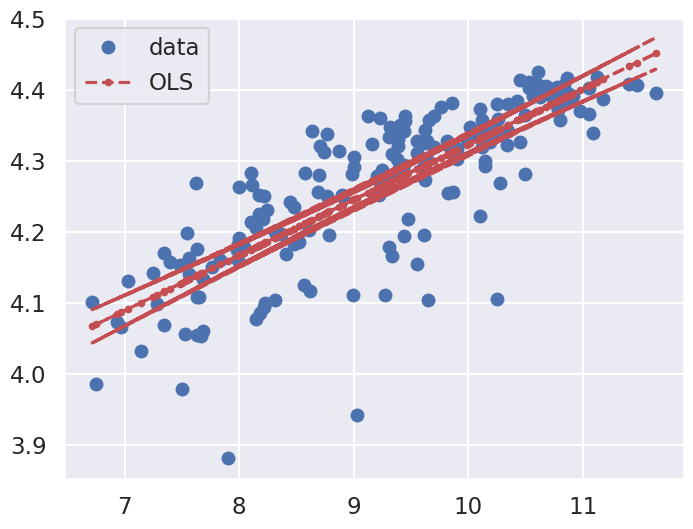

In [ ]:
pred_ols = mod.get_prediction()
iv_l = pred_ols.summary_frame()["mean_ci_lower"]
iv_u = pred_ols.summary_frame()["mean_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dffig[xvar], dffig[yvar], "o", label="data")
ax.plot(dffig[xvar], mod.fittedvalues, "r--.", label="OLS")
ax.plot(dffig[xvar], iv_u, "r--")
ax.plot(dffig[xvar], iv_l, "r--")
ax.legend(loc="best")

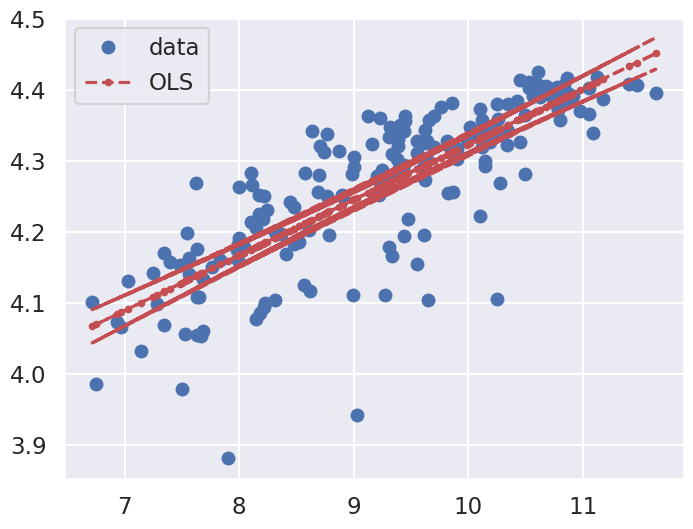

In [ ]:
fig

## Simple Regression of Log[Life Expectancy] and Log[GDP pc] for WB region dummies

In [ ]:
mod2 = smf.ols(formula='ln_life_exp ~ ln_gdp_pc + C(region)', data=dffig, missing='drop').fit()

In [ ]:
mod2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                     Adj. R-squared:            0.745    
Dependent Variable:        ln_life_exp             AIC:                       -524.8326
Date:                      2024-02-26 21:35        BIC:                       -499.1131
No. Observations:          184                     Log-Likelihood:            270.42   
Df Model:                  7                       F-statistic:               77.35    
Df Residuals:              176                     Prob (F-statistic):        2.26e-50 
R-squared:                 0.755                   Scale:                     0.0032382
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                                3.7983   0.0474 80.1247 0.0000  3.7047  3.8919
C(region)[T.Europe & Central Asia]       0.0208   0.0147  1.4109 0.1600 -0.0083  0.0499
C(region)[T.Latin America & Caribbean ]  0.0151   0.0152  0.9891 0.3240 -0.0150  0.0451
C(region)[T.Middle East & North Africa]  0.0294   0.0169  1.7354 0.0844 -0.0040  0.0627
C(region)[T.North America]               0.0255   0.0426  0.5985 0.5503 -0.0586  0.1097
C(region)[T.South Asia]                 -0.0052   0.0231 -0.2255 0.8219 -0.0509  0.0405
C(region)[T.Sub-Saharan Africa ]        -0.0911   0.0149 -6.1297 0.0000 -0.1205 -0.0618
ln_gdp_pc                                0.0518   0.0050 10.2953 0.0000  0.0419  0.0617
---------------------------------------------------------------------------------------
Omnibus:                      38.972              Durbin-Watson:                 2.290 
Prob(Omnibus):                0.000               Jarque-Bera (JB):              79.400
Skew:                         -0.986              Prob(JB):                      0.000 
Kurtosis:                     5.543               Condition No.:                 111   
=======================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

## Simple Regression of Log[Life Expectancy] and Log[GDP pc] and TFR, accounting for WB region dummies

In [ ]:
mod3 = smf.ols(formula='ln_life_exp ~ ln_gdp_pc + tfr + C(region)', data=dffig, missing='drop').fit()

In [ ]:
mod3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                     Adj. R-squared:            0.754    
Dependent Variable:        ln_life_exp             AIC:                       -530.3147
Date:                      2024-02-26 21:35        BIC:                       -501.3803
No. Observations:          184                     Log-Likelihood:            274.16   
Df Model:                  8                       F-statistic:               71.00    
Df Residuals:              175                     Prob (F-statistic):        6.11e-51 
R-squared:                 0.764                   Scale:                     0.0031269
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                                3.9325   0.0682 57.6766 0.0000  3.7979  4.0670
C(region)[T.Europe & Central Asia]       0.0161   0.0146  1.1047 0.2708 -0.0127  0.0449
C(region)[T.Latin America & Caribbean ]  0.0115   0.0150  0.7662 0.4446 -0.0181  0.0412
C(region)[T.Middle East & North Africa]  0.0355   0.0168  2.1151 0.0358  0.0024  0.0686
C(region)[T.North America]               0.0279   0.0419  0.6669 0.5057 -0.0548  0.1107
C(region)[T.South Asia]                 -0.0095   0.0228 -0.4171 0.6771 -0.0545  0.0355
C(region)[T.Sub-Saharan Africa ]        -0.0687   0.0168 -4.0911 0.0001 -0.1019 -0.0356
ln_gdp_pc                                0.0419   0.0061  6.8217 0.0000  0.0298  0.0541
tfr                                     -0.0168   0.0062 -2.6950 0.0077 -0.0290 -0.0045
---------------------------------------------------------------------------------------
Omnibus:                     56.848              Durbin-Watson:                 2.341  
Prob(Omnibus):               0.000               Jarque-Bera (JB):              168.323
Skew:                        -1.255              Prob(JB):                      0.000  
Kurtosis:                    6.956               Condition No.:                 164    
=======================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

# Producing a nice table with **stargazer**

In [ ]:
url = 'https://nbviewer.org/github/mwburke/stargazer/blob/master/examples.ipynb'
IFrame(url, width=800, height=400)

## Add the estimated models to **Stargazer**

In [ ]:
stargazer = Stargazer([mod, mod2, mod3])

In [ ]:
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
#stargazer.dep_var_name = ''
stargazer.dependent_variable = ' Log[Life Expectancy (' + str(year) + ')]'
stargazer.custom_columns(['Simple', 'WB Regs', 'TFR'], [1, 1, 1])
#stargazer.show_model_numbers(False)
stargazer.rename_covariates({'ln_gdp_pc':' Log[GDP per capita (' + str(year) + ')]',
                             'tfr':'Total Fertility Rate (' + str(year) + ')'})
stargazer.add_line('WB Region FE', ['No', 'Yes', 'Yes'], LineLocation.FOOTER_TOP)
stargazer.covariate_order(['ln_gdp_pc', 'tfr'])
stargazer.cov_spacing = 2

In [ ]:
stargazer

## To show the table
```python
HTML(stargazer.render_html())
```

In [ ]:
HTML(stargazer.render_html())

## To export the table to another file

In [ ]:
file_name = "gapminder_table.html" #Include directory path if needed
html_file = open(pathgraphs + file_name, "w" ) #This will overwrite an existing file
html_file.write( stargazer.render_html() )
html_file.close()

In [ ]:
url = pathgraphs + 'table.html'
url = 'https://smu-econ-growth.github.io/EconGrowthUG-Slides-Working-with-GapMinder/gapminder_table.html'
IFrame(url, width=500, height=400)

# Plotting GapMinder data

## Many options
* Since the data is a **pandas** dataframe, we could just use its functions as [we did previously](./Intro-Data-Analysis-Pandas.ipynb)
* Use the **[seaborn](https://seaborn.pydata.org/index.html)** package
* Use the **[plotly](https://plotly.com/python/)** package
* Use the **[plotnine](https://plotnine.readthedocs.io/en/stable/)** package

# Plots with 
<center><a href="https://seaborn.pydata.org/index.html#"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/logo-wide-lightbg.svg" alt="seaborn" width=700/></a></center>

In [ ]:
url = 'https://seaborn.pydata.org/examples/index.html'
IFrame(url, width=800, height=400)

Let's create a [Scatterplot with varying point sizes and hues](https://seaborn.pydata.org/examples/scatter_bubbles.html) that plots the latitude and Log[GDP per capita] of each country and uses its log-population and the WB region in the last available year as the size and hue.

## Using [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


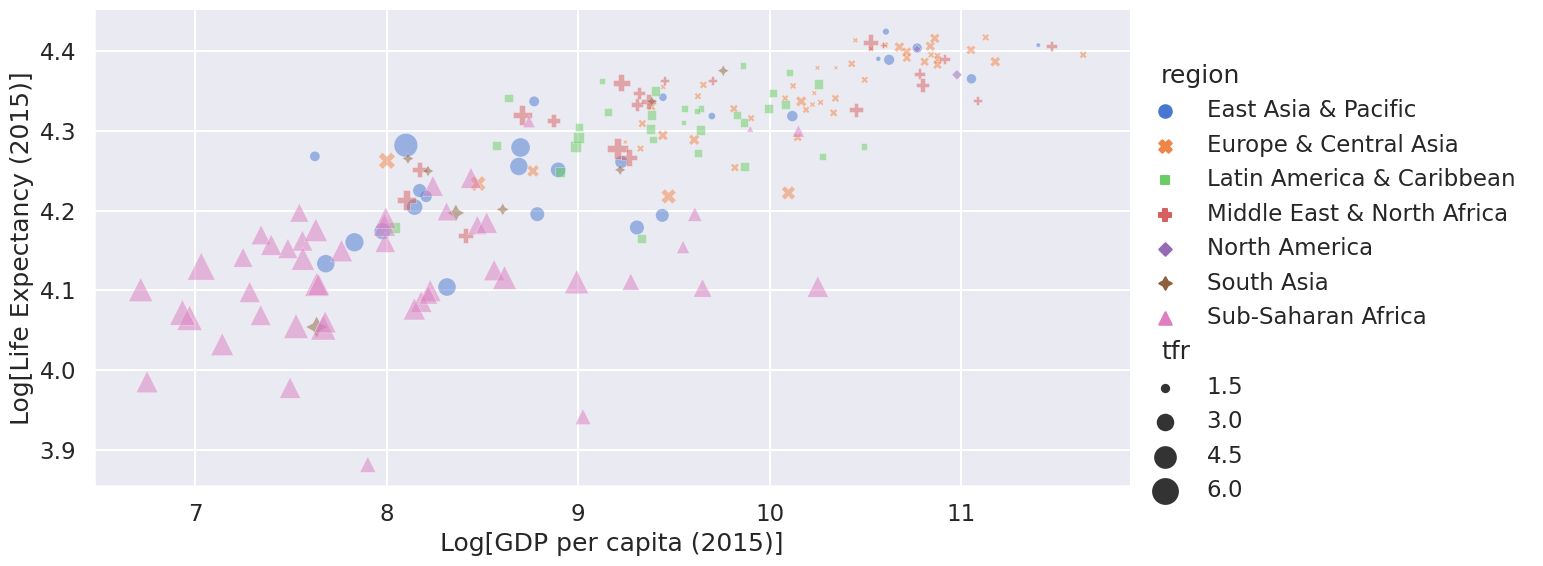

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

g = sns.relplot(x="ln_gdp_pc", 
                y="ln_life_exp", 
                data=dffig,
                hue="region",
                hue_order = dffig.region.drop_duplicates().sort_values(),
                style="region",
                style_order = dffig.region.drop_duplicates().sort_values(),
                size="tfr",
                sizes=(10, 400), 
                alpha=.5, 
                height=6,
                aspect=2,
                palette="muted",
               )
g.set_axis_labels('Log[GDP per capita (' + str(year) + ')]', 'Log[Life Expectancy (' + str(year) + ')]')

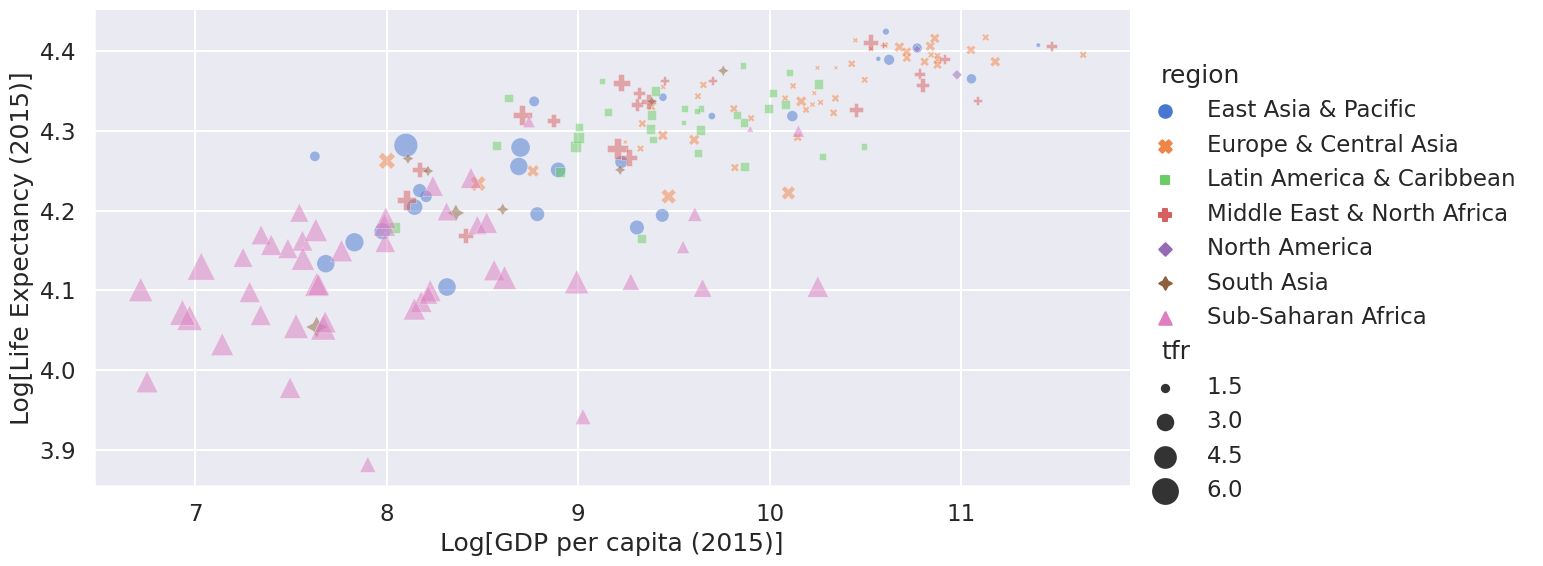

In [ ]:
g.fig

# Using [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

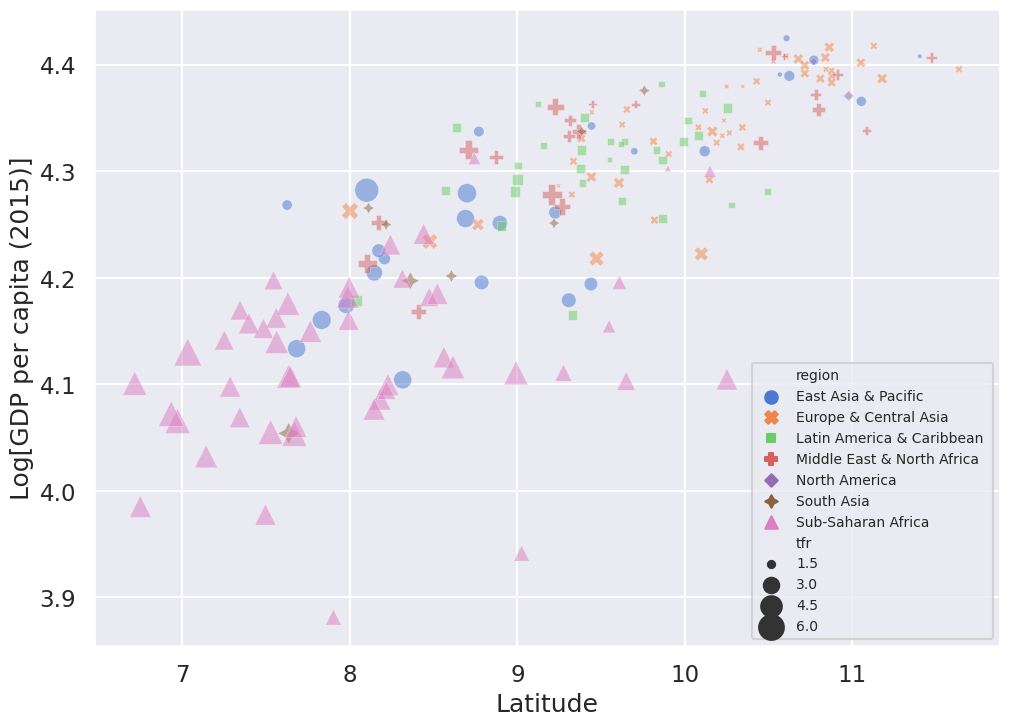

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

fig, ax = plt.subplots()
sns.scatterplot(x="ln_gdp_pc", 
                y="ln_life_exp", 
                data=dffig,
                hue="region",
                hue_order = dffig.region.drop_duplicates().sort_values(),
                style="region",
                style_order = dffig.region.drop_duplicates().sort_values(),
                size="tfr",
                sizes=(10, 400), 
                alpha=.5, 
                palette="muted",
                ax=ax
               )
ax.set_xlabel('Latitude')
ax.set_ylabel('Log[GDP per capita (' + str(year) + ')]')
ax.legend(fontsize=10)

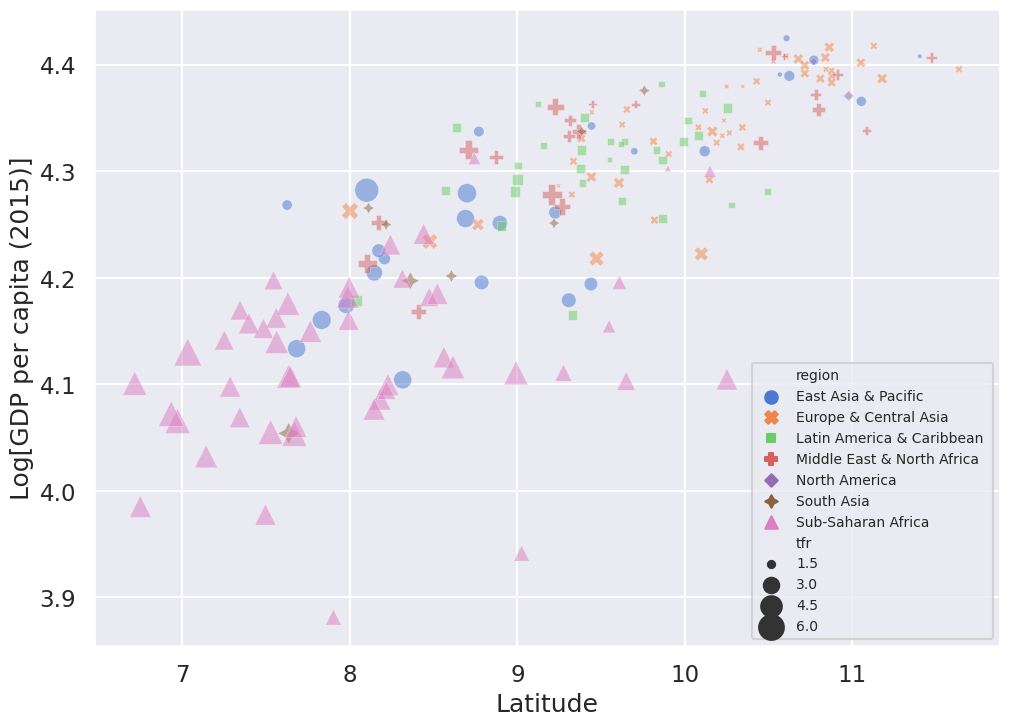

In [ ]:
fig

# Based on **seaborn** we can create a useful functions that create plots for us
## E.g., scatter plots with labels, OLS regression lines, 45 degree lines, etc

In [ ]:
def my_xy_plot(dfin, 
               x='ln_gdp_pc', 
               y='ln_life_exp', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Log[Income per capita in ' +  str(year) + ']',
               ylabel='Log[Life Expectancy ' +  str(year) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

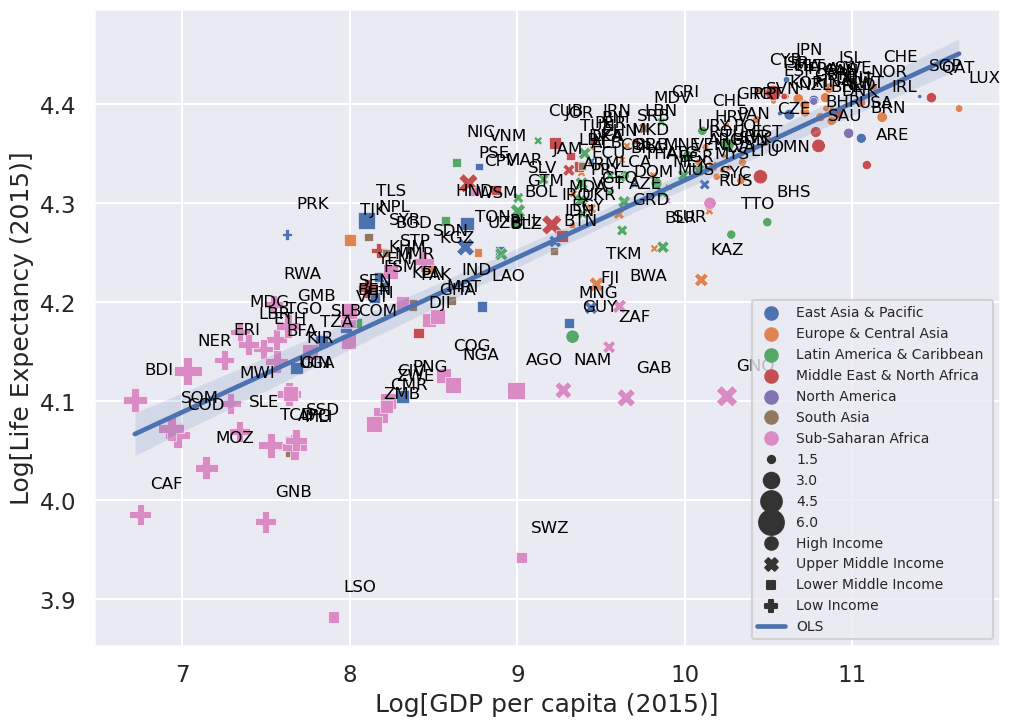

In [ ]:
g = my_xy_plot(dffig, 
               x='ln_gdp_pc', 
               y='ln_life_exp', 
               xlabel='Log[GDP per capita (' + str(year) +')]', 
               ylabel='Log[Life Expectancy (' + str(year) +')]', 
               OLS=True, 
               labels=True, 
               size="tfr", 
               sizes=(10, 400), 
               filename='ln-life-exp-ln-gdp-pc-gapminder.pdf')

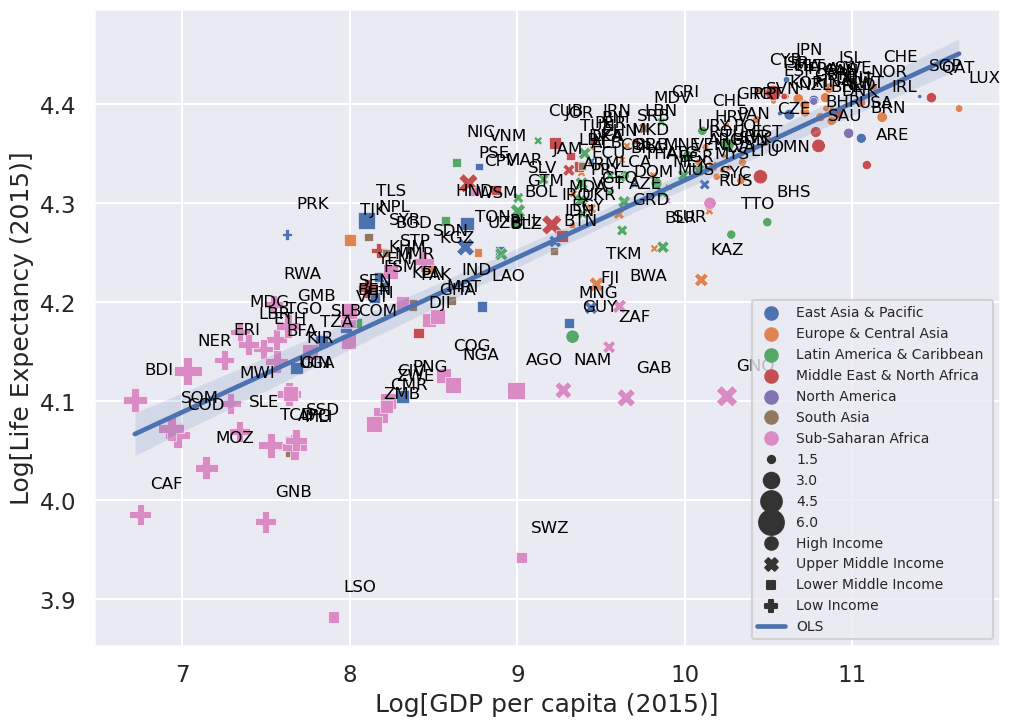

In [ ]:
g

## Plot the evolution of variables across time by groups

In [ ]:
def my_xy_line_plot(dfin, 
                    x='year', 
                    y='ln_gdp_pc', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Year', 
                    ylabel='Log[Income per capita in ' +  str(year) + ']',
                    labels=False,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='income-pop-growth.pdf',
                    hue='region',
                    hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                               'Latin America & Caribbean ', 'Middle East & North Africa',
                               'North America', 'South Asia', 'Sub-Saharan Africa '],
                    style='incomeLevel', 
                    style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    palette=None,
                    legend_fontsize=10,
                    label_fontsize=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

## Log[GDP per capita across the world] by WB Income Groups

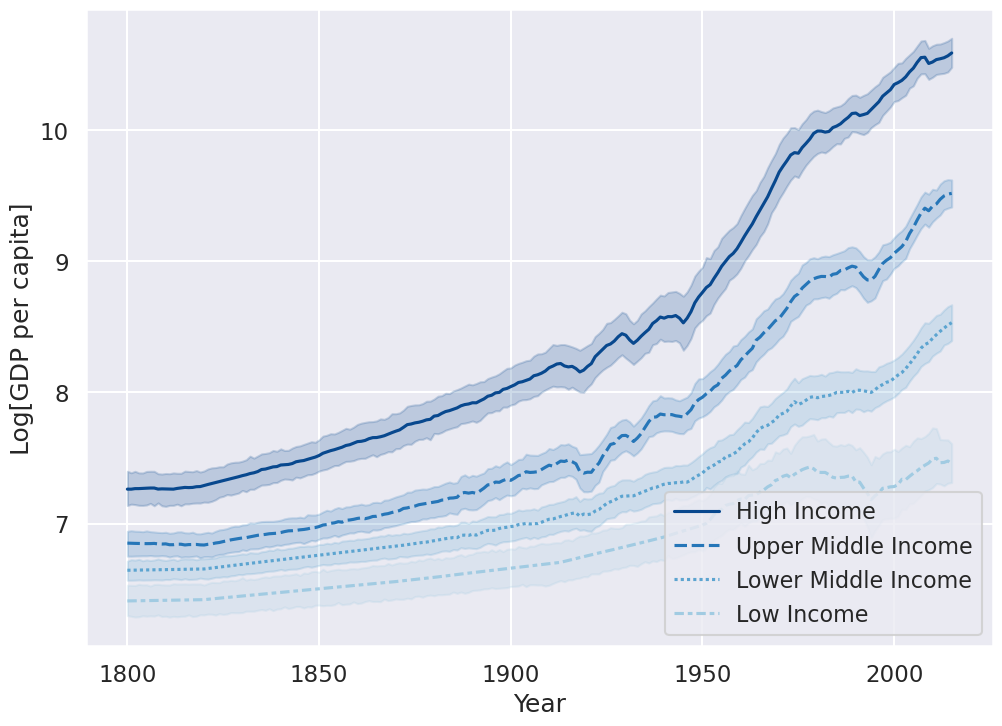

In [ ]:
palette=sns.color_palette("Blues_r", wdi['incomeLevel'].unique().shape[0]+6)[:wdi['incomeLevel'].unique().shape[0]*2:2]
fig = my_xy_line_plot(wdi, 
                x='year', 
                y='ln_gdp_pc', 
                xlabel='Year',
                ylabel='Log[GDP per capita]',
                filename='ln-gdp-pc-income-groups-TS-gapminder.pdf',
                hue='incomeLevel',
                hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                palette=palette,
                OLS=False, 
                labels=False,
                legend_fontsize=16,
                loc='lower right',
                save=True)

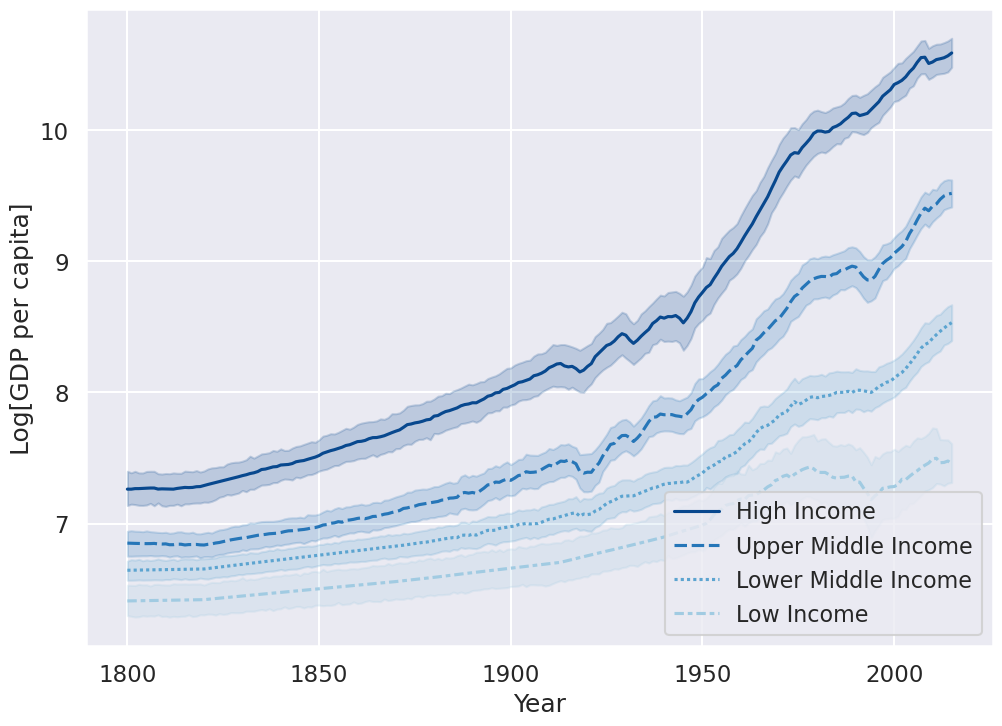

In [ ]:
fig

## Log[Life Expectancy] across the world by WB Regions

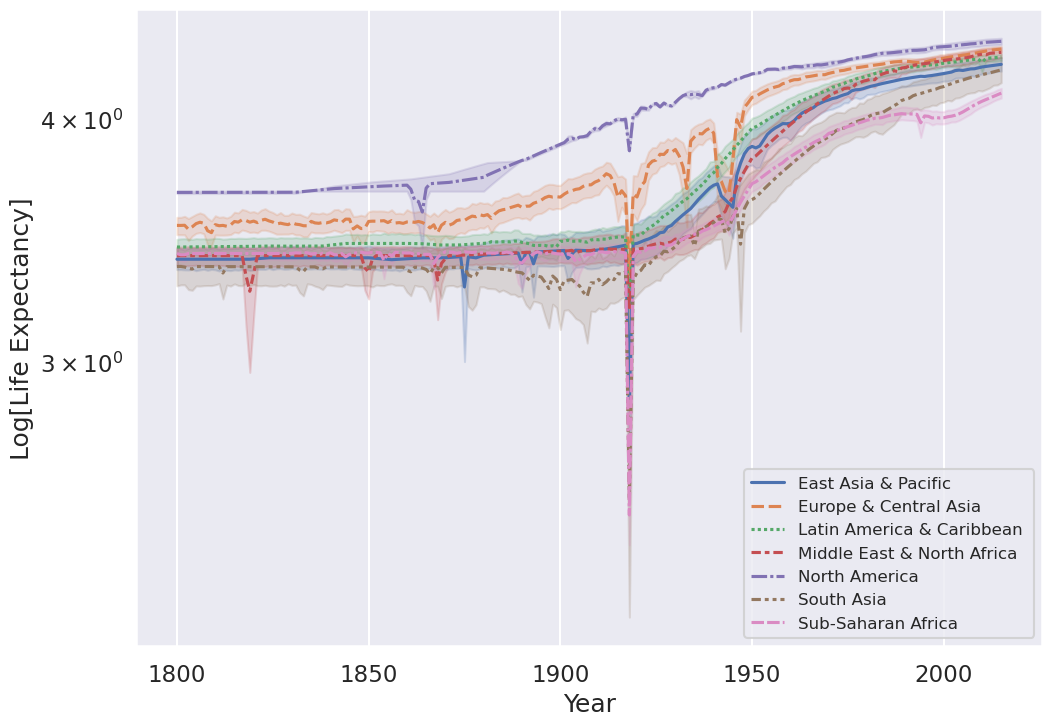

In [ ]:
#palette=sns.color_palette("Blues_r", wdi['region'].unique().shape[0]+6)[:wdi['region'].unique().shape[0]*2:2]
fig = my_xy_line_plot(wdi, 
                      x='year', 
                      y='ln_life_exp', 
                      xlabel='Year',
                      ylabel='Log[Life Expectancy]',
                      ylogscale=True,
                      filename='ln-life-exp-regions-TS-gapminder.pdf',
                      style='region',
                      style_order=['East Asia & Pacific', 'Europe & Central Asia',
                                   'Latin America & Caribbean ', 'Middle East & North Africa',
                                   'North America', 'South Asia', 'Sub-Saharan Africa '],
                      #palette=palette,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='lower right',
                      save=True)

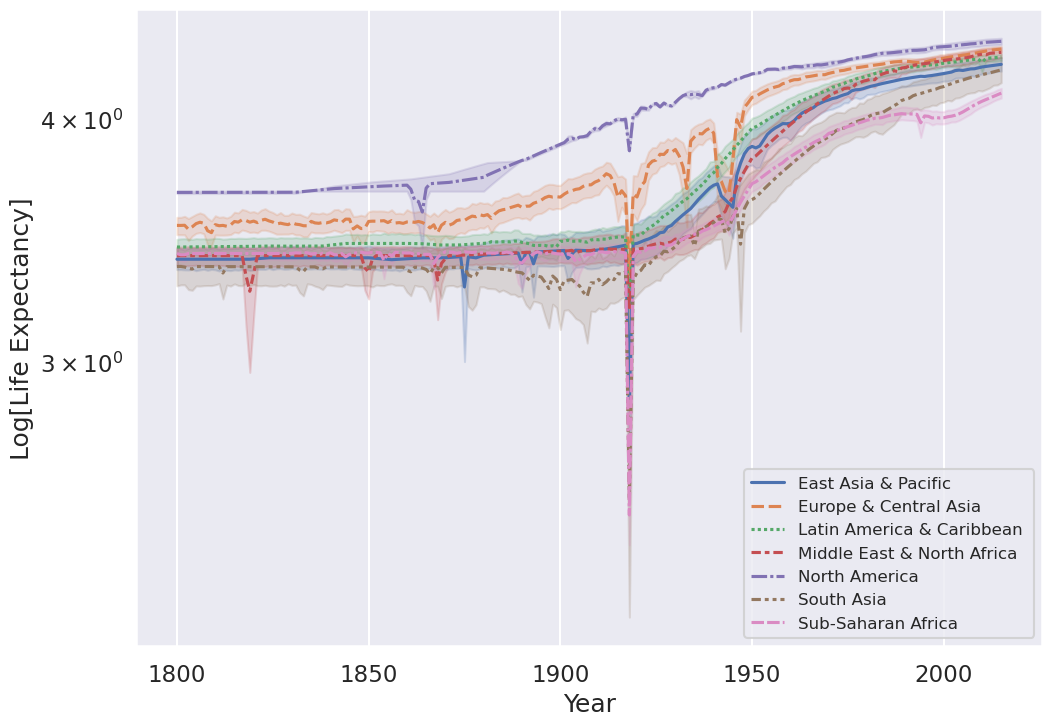

In [ ]:
fig

# Plots with 
<center><a href="https://plotly.com/python/"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/plot_ly-ar21.svg" alt="plotly express" width=700/></a></center>

In [ ]:
url = 'https://plotly.com/python/'
IFrame(url, width=800, height=400)

## Let's [select symbols to plot](https://plotly.com/python/marker-style/) so it looks like the previous ones and also to improve visibility

In [ ]:
symbols = ['circle', 'x', 'square', 'cross', 'diamond', 'star-diamond', 'triangle-up']
fig = px.scatter(dffig,
                 x="ln_gdp_pc", 
                 y="ln_life_exp", 
                 color='region',
                 symbol='region',
                 symbol_sequence=symbols,
                 hover_name='name',
                 hover_data=['iso3c', 'ln_gdp_pc', 'ln_life_exp'],
                 size='tfr',
                 size_max=15,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="black",
                 labels={
                     "latitude": "Latitude",
                     "ln_gdp_pc": "Log[GDP per capita (" + str(year) + ")]",
                     "ln_life_exp": "Log[Life Expectancy (" + str(year) + ")]",
                     "region": "WB Region"
                 },
                 opacity=0.75,
                 height=800,
                )

In [ ]:
fig.show()

# Change marker borders

In [ ]:
fig.update_traces(marker=dict(#size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

In [ ]:
fig.show()

# Increase width of trend line

In [ ]:
tr_line=[]
for  k, trace  in enumerate(fig.data):
        if trace.mode is not None and trace.mode == 'lines':
            tr_line.append(k)
print(tr_line)
for id in tr_line:
    fig.data[id].update(line_width=3)

[7]


In [ ]:
fig.show()

# Change legend position

In [ ]:
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.25,
    xanchor="left",
    x=0.9
))

In [ ]:
fig.show()

# To save the figure use in your desired format
```python
fig.write_image(pathgraphs + "fig1.pdf")
fig.write_image(pathgraphs + "fig1.png")
fig.write_image(pathgraphs + "fig1.jpg")
```

In [ ]:
fig.write_image(pathgraphs + "ln-life-exp-ln-gdp-pc-plotly-gapminder.pdf", height=1000, width=1500, scale=4)

## We can access the results of the regression in **plotly express**

In [ ]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     336.1
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.29e-43
Time:                        21:35:47   Log-Likelihood:                 237.38
No. Observations:                 184   AIC:                            -470.8
Df Residuals:                     182   BIC:                            -464.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5419      0.040     89.072      0.000       3.463       3.620
x1             0.0781      0.004     18.334      0.000       0.070       0.087
==============================================================================
Omnibus:                       61.936   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.770
Skew:                          -1.422   Prob(JB):                     3.71e-37
Kurtosis:                       6.714   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Maps with
<center><a href="https://seaborn.pydata.org/index.html#"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/logo-wide-lightbg.svg" alt="seaborn" width=700/></a></center>

# To create maps we need to obtain *geographical information*

There are various types of data in **Geographic Information Systems (GIS)**

* Location of cities, resources, etc. (point data)

* Shape of rivers, borders, countries, etc. (shape data)

* Numerical data for locations (elevation, temperature, number of people)

## Download Country boundary data from [Natural Earth](http://www.naturalearthdata.com/)

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))

In [ ]:
countries.head()

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          0          2  Indonesia    IDN         0      2   
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Indonesia  ...       NaN        NaN       NaN   
1  Sovereign country   1   Malaysia  ...       NaN        NaN       NaN   
2  Sovereign country   1      Chile  ...       NaN        NaN       NaN   
3  Sovereign country   1    Bolivia  ...       NaN        NaN       NaN   
4  Sovereign country   1       Peru  ...       NaN        NaN       NaN   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0       NaN        NaN       NaN       NaN        NaN       NaN   
1       NaN        NaN       NaN       NaN        NaN       NaN   
2       NaN        NaN       NaN       NaN        NaN       NaN   
3       NaN        NaN       NaN       NaN        NaN       NaN   
4       NaN        NaN       NaN       NaN        NaN       NaN   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  
1  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...  
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...  

[5 rows x 169 columns]

## The boundary file is a **geopandas** dataframe

Text(0.5, 1.0, 'WGS84 (lat/lon)')

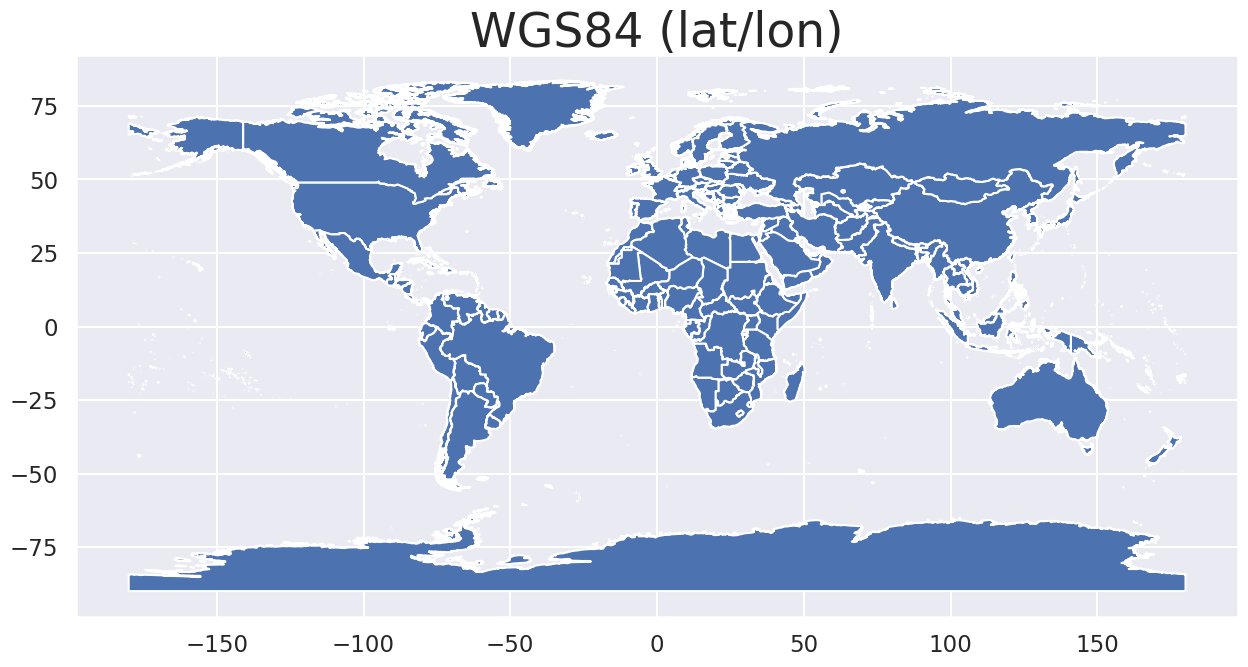

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax)
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

## Merge with other data and plot

In [ ]:
dffig2 = countries.merge(dffig, left_on='ADM0_A3', right_on='iso3c')

Text(0.5, 1.0, 'WGS84 (lat/lon)')

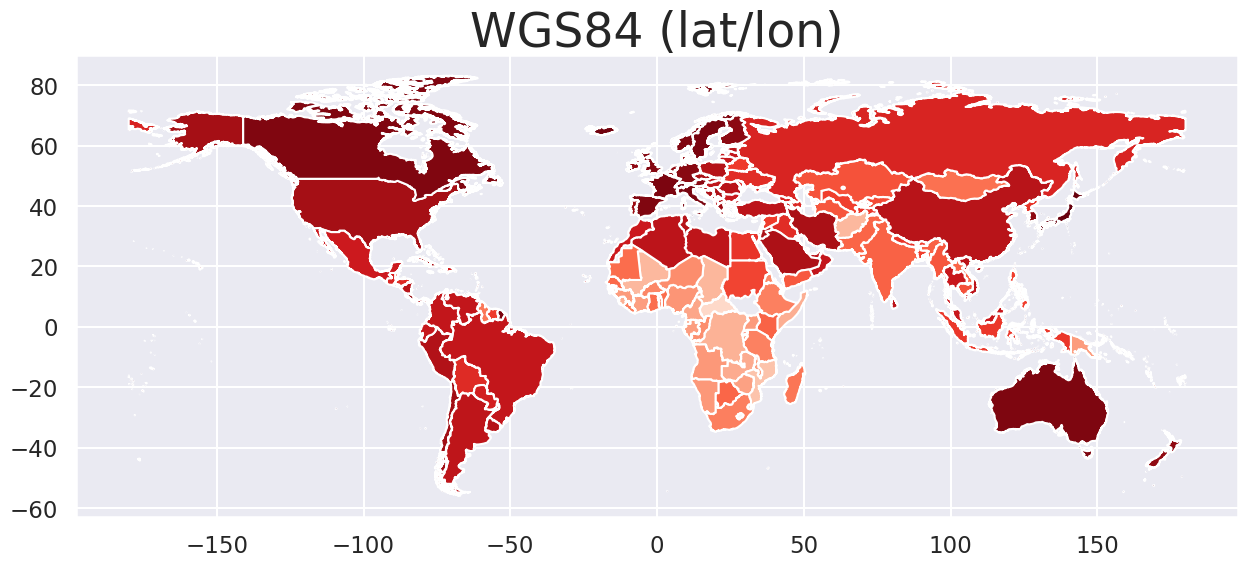

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
dffig2.plot(column='life_exp', ax=ax, cmap='Reds')
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

# Maps with [geoplot](https://residentmario.github.io/geoplot/)

In [ ]:
url = 'https://residentmario.github.io/geoplot/'
IFrame(url, width=800, height=400)

# Plot Countries

<GeoAxes: >

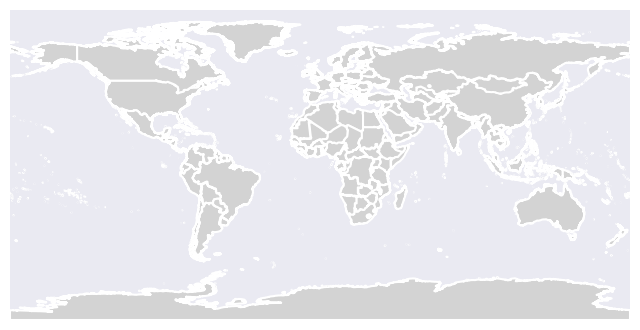

In [ ]:
gplt.polyplot(
    countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    edgecolor='white', facecolor='lightgray',
    rasterized=True,
    extent=[-180, -90, 180, 90],
)

# Plot Data

<GeoAxes: >

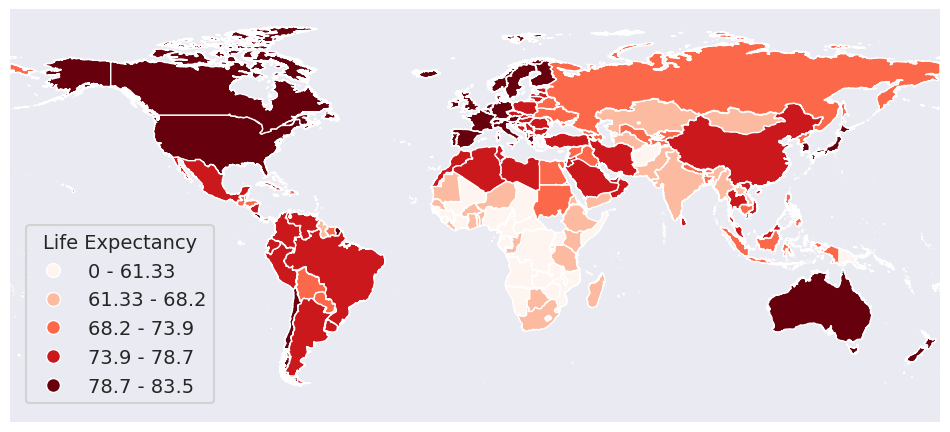

In [ ]:
gplt.choropleth(dffig2, hue='life_exp', 
                projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
                edgecolor='white', 
                linewidth=1,
                cmap='Reds', legend=True,
                scheme='FisherJenks',
                legend_kwargs={'bbox_to_anchor':(0.23, 0.5),
                               'frameon': True,
                               'title':'Life Expectancy',
                               'fontsize':14,
                               'title_fontsize':14,
                              },
                figsize=(12,8),
                rasterized=True,
               )

# Data and Borders

<GeoAxes: >

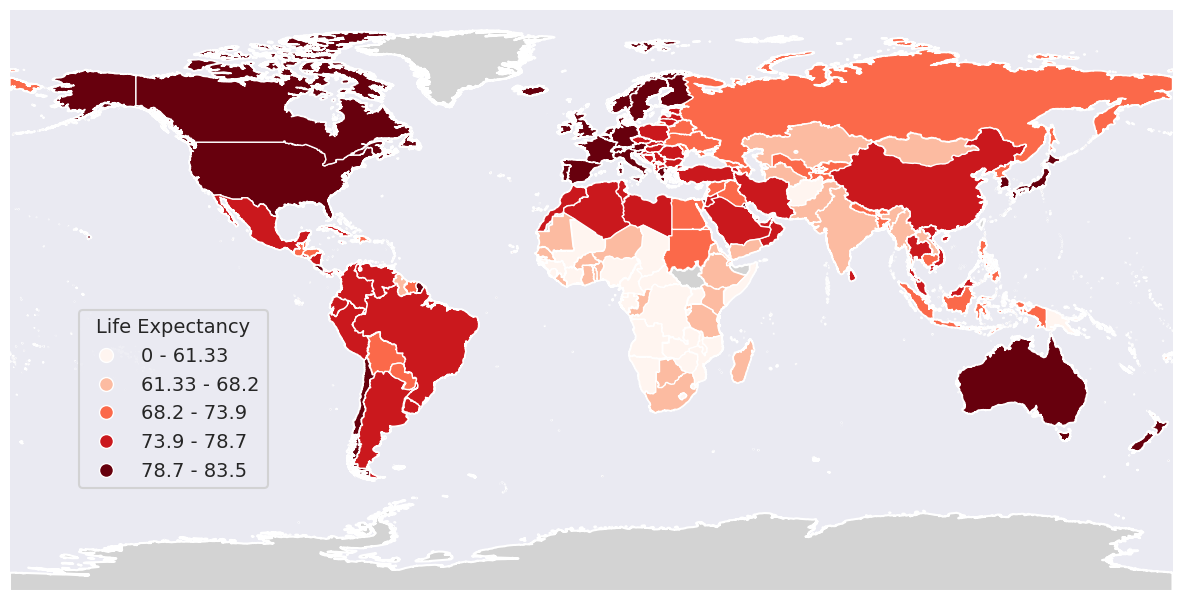

In [ ]:
ax = gplt.choropleth(dffig2, hue='life_exp', projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
                     edgecolor='white', linewidth=1,
                     cmap='Reds', legend=True,
                     scheme='FisherJenks',
                     legend_kwargs={'bbox_to_anchor':(0.23, 0.5),
                                    'frameon': True,
                                    'title':'Life Expectancy',
                                    'fontsize':14,
                                    'title_fontsize':14,
                                   },
                     figsize=(15,10),
                     rasterized=True,
                    )
gplt.polyplot(countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
              edgecolor='white', facecolor='lightgray',
              ax=ax,
              rasterized=True,
              extent=[-180, -90, 180, 90],
             )

# Use a nice function

In [ ]:
# Functions for plotting
def center_wrap(text, cwidth=32, **kw):
    '''Center Text (to be used in legend)'''
    lines = text
    #lines = textwrap.wrap(text, **kw)
    return "\n".join(line.center(cwidth) for line in lines)

def MyChoropleth(mydf, 
                 myfile='', 
                 myvar='',
                 mylegend='', 
                 k=5,
                 extent=[-180, -90, 180, 90],
                 figsize=(24, 16),
                 bbox_to_anchor=(0.2, 0.5),
                 fontsize=12, 
                 title_fontsize=12,
                 edgecolor='white', 
                 facecolor='lightgray',
                 scheme='FisherJenks', 
                 bins=None, 
                 pct=None,
                 legend=True, 
                 legend_labels=None, 
                 legend_kwargs=None,
                 legend_values=None,
                 bold=True,
                 rasterized=False,
                 save=True,
                 percent=False,
                 rn=0,
                 cmap='Reds',
                 reverse=False,
                 **kwargs):
    # Choropleth
    # Color scheme
    if scheme=='EqualInterval':
        scheme = mc.EqualInterval(mydf[myvar], k=k)
    elif scheme=='Quantiles':
        scheme = mc.Quantiles(mydf[myvar], k=k)
    elif scheme=='BoxPlot':
        scheme = mc.BoxPlot(mydf[myvar], k=k)
    elif scheme=='FisherJenks':
        scheme = mc.FisherJenks(mydf[myvar], k=k)
    elif scheme=='FisherJenksSampled':
        scheme = mc.FisherJenksSampled(mydf[myvar], k=k)
    elif scheme=='HeadTailBreaks':
        scheme = mc.HeadTailBreaks(mydf[myvar], k=k)
    elif scheme=='JenksCaspall':
        scheme = mc.JenksCaspall(mydf[myvar], k=k)
    elif scheme=='JenksCaspallForced':
        scheme = mc.JenksCaspallForced(mydf[myvar], k=k)
    elif scheme=='JenksCaspallSampled':
        scheme = mc.JenksCaspallSampled(mydf[myvar], k=k)
    elif scheme=='KClassifiers':
        scheme = mc.KClassifiers(mydf[myvar], k=k)
    elif scheme=='Percentiles':
        scheme = mc.Percentiles(mydf[myvar], pct=pct)
    elif scheme=='UserDefined':
        scheme = mc.UserDefined(mydf[myvar], bins=bins)
    
    if legend:
        legend_kwargs = {'bbox_to_anchor': bbox_to_anchor,
                         'frameon': True,
                         'title':mylegend,
                         'fontsize':fontsize,
                         'title_fontsize':title_fontsize,
               }
        if legend_labels is None:
            # Format legend
            upper_bounds = scheme.bins
            # get and format all bounds
            bounds = []
            for index, upper_bound in enumerate(upper_bounds):
                if index == 0:
                    lower_bound = mydf[myvar].min()
                else:
                    lower_bound = upper_bounds[index-1]
                # format the numerical legend here
                if percent:
                    bound = f'{lower_bound:.{rn}%} - {upper_bound:.{rn}%}'.format(width=rn)
                else:
                    bound = f'{float(lower_bound):,.{rn}f} - {float(upper_bound):,.{rn}f}'.format(width=rn)
                bounds.append(bound)
            legend_labels = bounds
        
        # Reverse the order of the legend labels
        if reverse:
            legend_labels = legend_labels[::-1]
            legend_values = list(range(len(legend_labels)))[::-1]
    
    #Plot
    ax = gplt.choropleth(
        mydf, hue=myvar, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap=cmap, legend=legend,
        scheme=scheme,
        legend_kwargs=legend_kwargs,
        legend_labels = legend_labels,
        legend_values=legend_values,
        figsize=figsize,
        rasterized=rasterized,
    )
    gplt.polyplot(
        countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor=edgecolor, facecolor=facecolor,
        ax=ax,
        rasterized=rasterized,
        extent=extent,
    )
    # Make the legend title bold
    if bold:
        ax.get_legend().get_title().set_fontweight('bold')
    
    if save:
        #plt.savefig(pathgraphs + myfile + '_' + myvar.replace(' ', '_') +'.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(pathgraphs + myfile + '_' + myvar.replace(' ', '_') +'.jpg', dpi=300, bbox_inches='tight')
    return ax


<GeoAxes: >

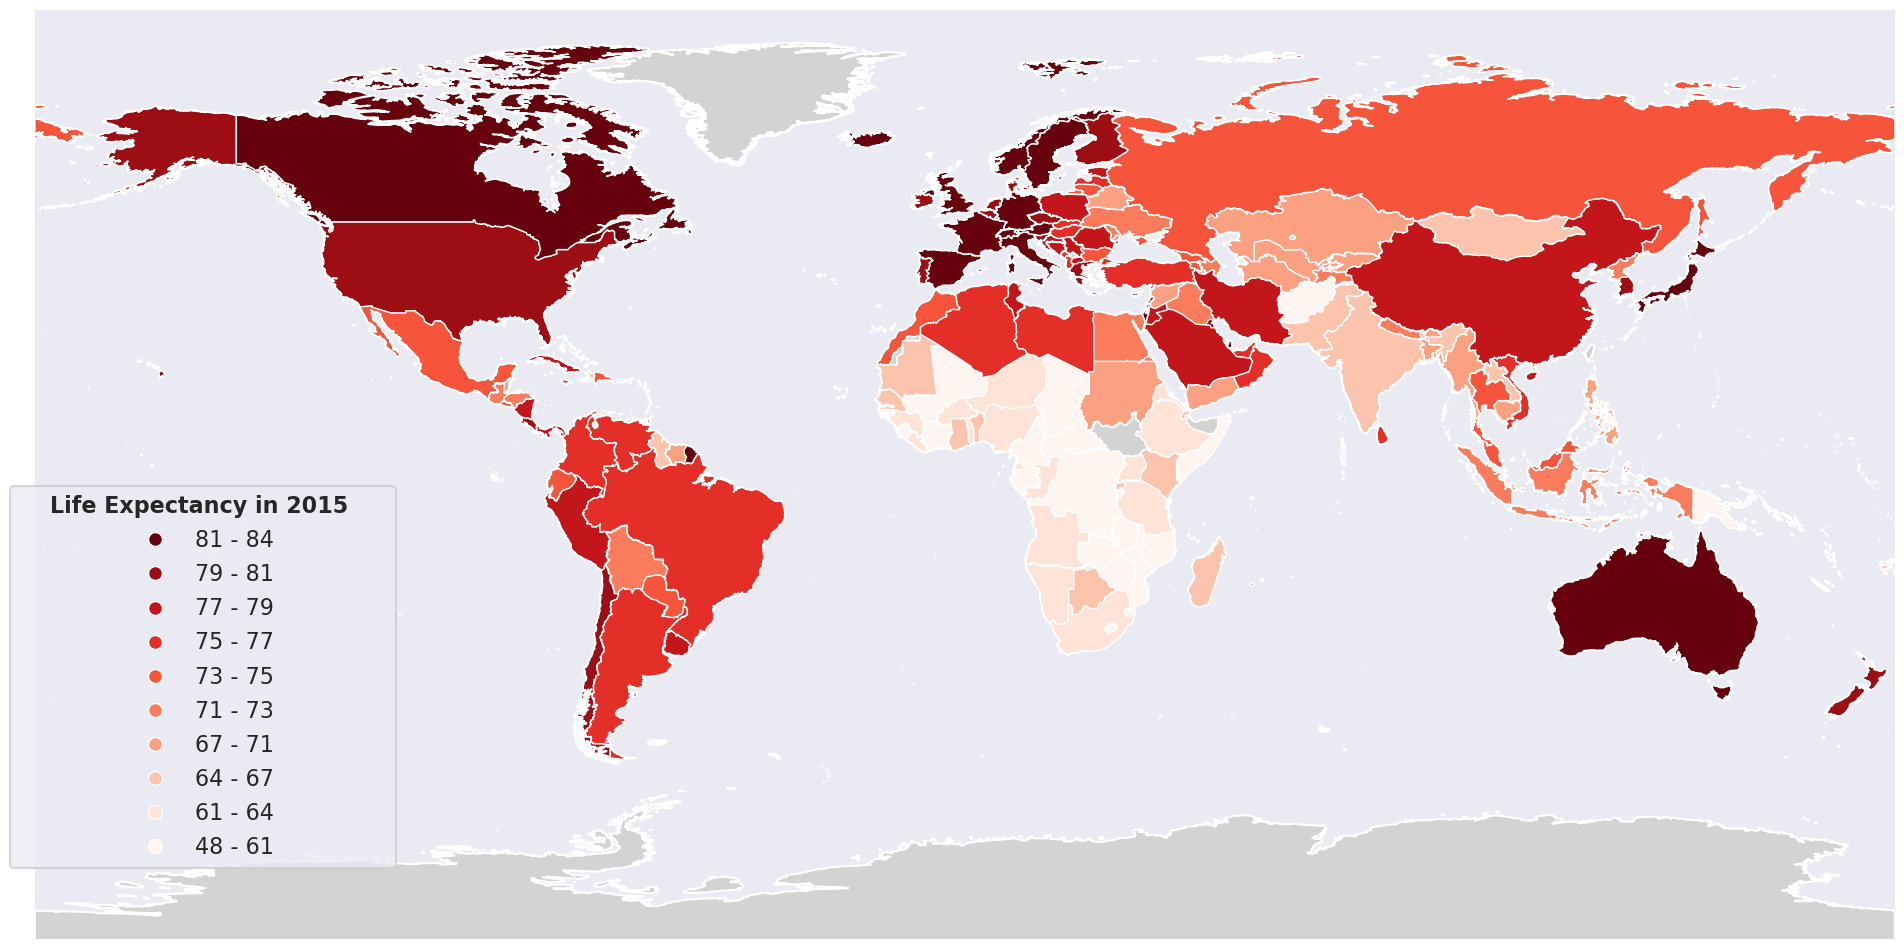

In [ ]:
mylegend = center_wrap(["Life Expectancy in " + str(year)], cwidth=32, width=32)
MyChoropleth(dffig2, myfile='fig-gapminder-life-exp-' + str(year), 
             myvar='life_exp', 
             mylegend=mylegend, 
             k=10, 
             fontsize=16, 
             title_fontsize=16,
             reverse=True,
             scheme='Quantiles', 
             save=True)

# Quick and Easy Maps with
<center><a href="https://plotly.com/python/"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/plot_ly-ar21.svg" alt="plotly express" width=700/></a></center>

In [ ]:
url = 'https://plotly.com/python/maps/'
IFrame(url, width=800, height=400)

# Map using classes (similar to **geoplot**)

## Choose a classifier and classify the data

In [ ]:
scheme = mc.Quantiles(dffig2['life_exp'], k=8)
classifier = mc.Quantiles.make(k=8, rolling=True)
dffig2['life_exp_q'] = classifier(dffig2['life_exp'])
dffig2['life_exp_qc'] = dffig2['life_exp_q'].apply(lambda x: scheme.get_legend_classes()[x].replace('[   ', '[').replace('( ', '('))

In [ ]:
fig = px.choropleth(dffig2.sort_values('life_exp_q', ascending=False), 
                    locations="iso3c",
                    color="life_exp_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'tfr'],
                    labels={
                        "life_exp_qc": "Life Expectancy (" + str(year) + ")",
                    },
                    color_discrete_sequence=px.colors.sequential.Reds_r,
                    height=600, 
                    width=1000,
                   )
# Change legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.15,
    xanchor="left",
    x=0.05
))

In [ ]:
fig.show()

In [ ]:
fig = px.choropleth(dffig2.sort_values('life_exp_q', ascending=False), 
                    locations="iso3c",
                    color="life_exp_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'life_exp' ,'tfr'],
                    labels={
                        "life_exp_qc": "Life Expectancy (" + str(year) + ")",
                        "life_exp": "Life Expectancy (" + str(year) + ")",
                        'iso3c':'ISO code',
                        "tfr": "Total Fertility Rate (" + str(year) + ")]",
                    },
                    color_discrete_sequence=px.colors.sequential.Blues_r,
                    height=600, 
                    width=1000,
                   )
# Change legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.15,
    xanchor="left",
    x=0.05
))

In [ ]:
fig.show()

In [ ]:
fig = px.choropleth(dffig, 
                    locations="iso3c",
                    color="life_exp",
                    hover_name='name',
                    hover_data=['iso3c', 'tfr'],
                    labels={
                        "life_exp": "Life Expectancy (" + str(year) + ")]",
                        "tfr": "Total Fertility Rate"
                    },
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    color_continuous_scale="Reds",
                    height=600, 
                    width=1100,
                   )

In [ ]:
fig.show()

In [ ]:
fig.update_layout(coloraxis_colorbar=dict(
    orientation = 'h',
    yanchor="bottom", 
    xanchor="left", 
    y=-.2,
    x=0,
))
fig.update_coloraxes(colorbar_title_side='top')

In [ ]:
fig.show()

In [ ]:
# Change legend position
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.01,
    orientation='h',
))

In [ ]:
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = dffig['iso3c'],
    z = dffig['life_exp'],
    text = dffig['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Life Expectancy',
    )                  
)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=5,
        r=5,
        b=10,
        t=10,
        pad=1
    ),
    paper_bgcolor="LightSteelBlue",
)

In [ ]:
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = dffig['iso3c'],
    z = dffig['life_exp'],
    text = dffig['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Life Expectancy',
    )                  
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=1,
        t=1,
        pad=.1
    ),
    paper_bgcolor="LightSteelBlue",
)
# Change legend position
cb = fig.data[0].colorbar
cb.orientation = 'h'
cb.yanchor = 'bottom'
cb.xanchor = 'center'
cb.y = .1
cb.title.side = 'top'

In [ ]:
fig.show()

# <center>Exercises</center>

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Using the <code>MyChoropleth</code> function map the global spatial distribution of <b>TFR</b>, <b>CBR</b>, and <b>CDR</b> in the years 1990, 1995, 2000, 2010, and the last year in the sample.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Using the <code>my_xy_plot</code> function plot the relation between <b>GDP per capita</b> and <b>Life Expectancy</b>, <b>TFR</b>, <b>CBR</b>, and <b>CDR</b> in the years 1990, 1995, 2000, 2010, 2020.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Using the <code>my_xy_line_plot</code> function plot the evolution of <b>Life Expectancy</b>, <b>TFR</b>, <b>CBR</b>, and <b>CDR</b> by income groups and regions (separate figures).
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Plot the relation between <b>Life Expectancy</b>, <b>TFR</b>, <b>CBR</b>, and <b>CDR</b> in the year 2015.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 5:</b> Create a dynamic maps for <b>TFR</b>, <b>CBR</b>, and <b>CDR</b> in the year 2015 across the world. 
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Explore the relation between economic development as measured by Log[GDP per capita] and <b>Life Expectancy</b>, <b>TFR</b>, <b>CBR</b>, and <b>CDR</b>. Show the relations in one nice looking table. Also, produce a few nice looking figures.
</div>

Notebook written by [Ömer Özak](http://omerozak.com) for his students in Economics at [Southern Methodist University](http://www.smu.edu). Feel free to use, distribute, or contribute.

[<center><img src="https://github.com/measuring-culture/Expanding-Measurement-Culture-Facebook-JRSI/blob/main/pics/SMUlogowWordmarkRB.jpg?raw=true" width="250"></center>](http://omerozak.com)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f55f033-f0c9-4f24-8b2d-a6e8021bf4a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>